# Vehicles EDA + ML

## General Analysis


This section of the code performs the initial setup for the project:
1. Imports necessary libraries for data analysis and machine learning.
2. Reads the 'vehicles.csv' file into a pandas DataFrame.
3. Displays the first 10 rows of the DataFrame.
4. Provides information about the DataFrame and its unique values.
5. Joins the similar vehicle conditions that can be considered the same.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.cluster import MiniBatchKMeans


In [2]:
#Reading the csv file
vehicles = pd.read_csv('vehicles.csv')

In [3]:
#Display the first 10 rows of the DataFrame
vehicles.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [4]:
#Display information about the DataFrame
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
#Count the unique values for each feature
print(vehicles.nunique())

id              426880
url             426880
region             404
region_url         413
price            15655
year               114
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64


In [6]:
#Generating descriptive statistics for the DataFrame
vehicles.describe(include='object')


,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,426880,426880,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426812,426810,426880,426812
unique,426880,404,413,42,29667,6,8,5,6,3,118264,3,4,13,12,241899,360911,51,381536
top,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-04-23T22:13:05-0400
freq,1,3608,2988,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,7357,231,50614,12


Insights about the previous summary?

In [7]:
#Generating the value counts for the 'condition' column
print(vehicles['condition'].value_counts(dropna=False))

condition
NaN          174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64


- Syntactic Issues: Presence of NaN values.
- Semantic Issues: Values like 'like new' and 'excellent' might be considered equivalent in some contexts.

In [8]:
#Mapping the different vehicle conditions to reduce the variety of them
condition_mapping = {
    'good': 'good',
    'fair': 'good',
    'excellent': 'excellent',
    'like new': 'excellent',
    'new': 'new',  
    'salvage': 'salvage'
}
vehicles['condition'] = vehicles['condition'].map(condition_mapping)

In [9]:
#Generating the value counts for the 'condition' column after mapping 
print(vehicles['condition'].value_counts(dropna=False))

condition
NaN          174104
good         128225
excellent    122645
new            1305
salvage         601
Name: count, dtype: int64


## Cleaning Data

### Remove redundant and sparse features




This section of the code performs the cleaning data for the project:
 1. Dropped columns 'url', 'image_url', 'region_url'.
 2. Dropped columns with more than 40% null values.
 3. Displayed remaining columns after dropping.
 4. Defined function check_outliers and remove_outliers to identify and remove outliers in specified columns.


In [10]:
#Dropping the url columns as we don't need it
vehicles.drop(columns=['url', 'image_url', 'region_url'], inplace=True)
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,drive,size,type,paint_color,description,county,state,lat,long,posting_date
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [11]:
#Calculate the threshold for dropping columns based on 40% null values
threshold = len(vehicles) * 0.4

#Drop columns with more than 40% null values
vehicles.dropna(thresh=threshold, axis=1, inplace=True)

#Display the remaining columns after dropping
print("Remaining columns after dropping those with >40% null values:")
print(vehicles.columns)


Remaining columns after dropping those with >40% null values:
Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'type', 'paint_color', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')


In [12]:
vehicles.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


#### Remove Outliers

In [13]:
#Creating a function 
from typing import List, Union, Dict
def check_outliers(df: pd.DataFrame, cols: List[str], store: bool = False) -> Union[None, Dict[str, List[int]]]:
    """
    The function takes a dataframe, a list of columns, and a boolean store.
    If store=False, it only prints the number of outliers in each column of the list.
    If store=True, it returns a dictionary with column names as keys and their respective outliers as values.

    Parameters
    ----------
    df: Dataframe
    cols: list
    store: bool

    Returns
    -------
    If store=True:
        dict_outliers: dict
    """
    
    dict_outliers=dict()
    for cat in cols:
        df_cat = df[cat]
        Q1 = df_cat.quantile(0.25) # 1er cuartil
        Q3 = df_cat.quantile(0.75)# 2do cuartil
        IQR = Q3-Q1 # interquartile range
        outlier_step = IQR * 1.5
        outliers = df_cat[~((df_cat >= Q1 - outlier_step) & (df_cat <= Q3 + outlier_step))].index.tolist()
        dict_outliers[cat]=outliers
        if not store:
            print('There are {} outliers in {} column'.format(len(outliers),cat))
    if store:
        return dict_outliers

In [14]:
#Checking the outliers in price, year and odometer columns
num_col = vehicles[['price','year','odometer']]
check_outliers(vehicles, num_col)


There are 8177 outliers in price column
There are 17101 outliers in year column
There are 8785 outliers in odometer column


In [15]:
def remove_outliers(df: pd.DataFrame, cols: List[str]) -> None:
    """
    The function takes a dataframe and a list of columns and drops the outliers in those columns.
    
    Parameters
    ----------
    df: Dataframe
    cols: list
    """
    outliers = check_outliers(df, num_col, store=True)
    for cat in cols:
        df.drop(outliers[cat], inplace = True, errors = 'ignore')

In [16]:
#Displaying insights before and after cleaning the outliers
print("Before cleaning, the dataframe had {} rows.".format(vehicles.shape[0]))
remove_outliers(vehicles, num_col)
print("After cleaning, the dataframe has {} rows.".format(vehicles.shape[0]))


Before cleaning, the dataframe had 426880 rows.


After cleaning, the dataframe has 394306 rows.


## Feature Relations

This section of the code performs the Feature Relations for the project:

1. Displaying the correlation matrix of the variables in the Dataframe.
2. Displaying the correlation between 'price' and 'year' features.
3. Displaying the correlation between 'price' and 'odometer' features.
4. Displaying a pairplot to visualize the relationships between all numerical features.

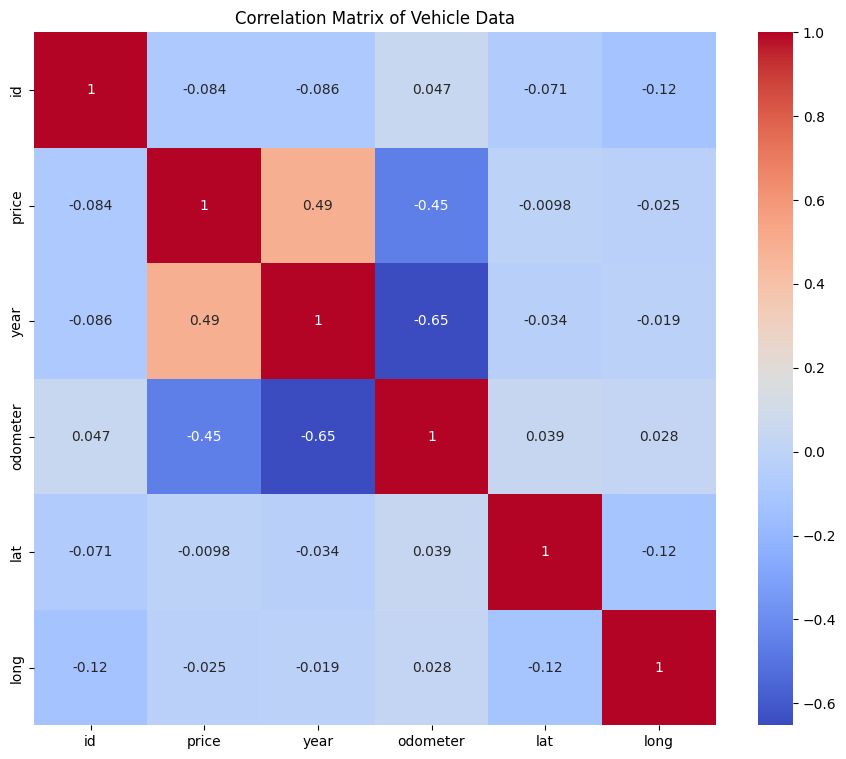

In [17]:
#Compute the correlation matrix
corr = vehicles[vehicles.describe(exclude='object').columns].corr()

#Set up the matplotlib figure
plt.figure(figsize=(11, 9))

#Draw the heatmap with numeric annotations activated
sns.heatmap(corr, cmap='coolwarm',annot=True)
plt.title('Correlation Matrix of Vehicle Data')
plt.show()


Explanation of the positive correlation between price and year:

Generally, newer vehicles (higher year) are expected to be priced higher due to less usage, newer technology, and lower mileage. This is why a positive correlation between the 'year' and 'price' of vehicles is observed.

Another insight we can get from this graphics is that the newest cars in the market (from 2022) have the lowest price. This may sound contradictory with the previous statement that newer vehicles tend to have a higher price, but it tells us that the newest cars sold on second hand markets are probably cars that had some hidden damages, accidents, or issues affecting the market value.

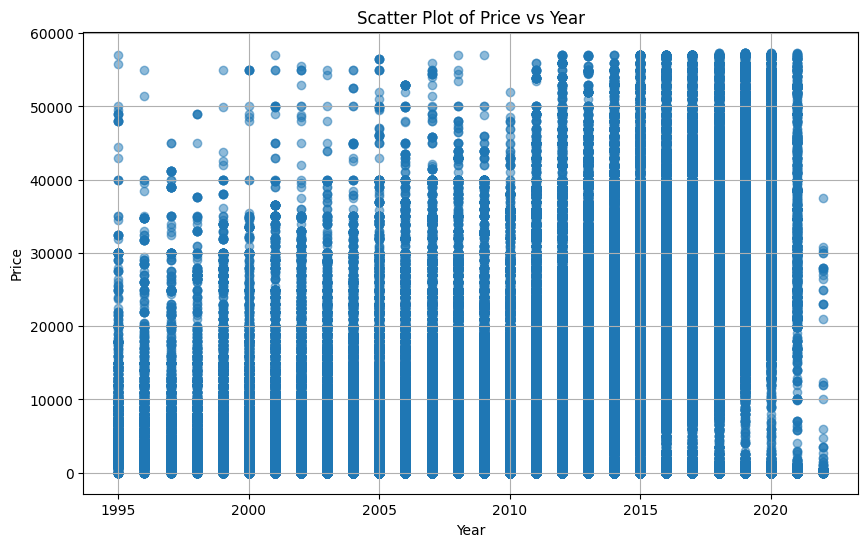

In [18]:
#Creating a scatter plot to visualize the relationship between 'year' and 'price'
plt.figure(figsize=(10, 6))
plt.scatter(vehicles['year'], vehicles['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()


C:\Users\Guim\AppData\Local\Temp\ipykernel_18516\4016904783.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=vehicles, x='year', y='price', ci=None)


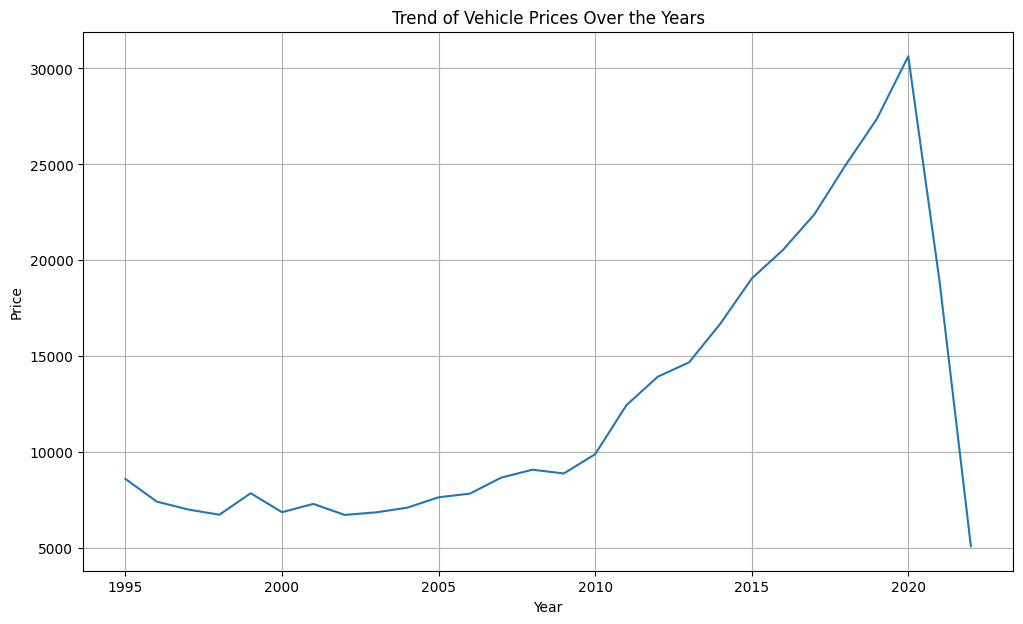

In [19]:
#Creating a line plot to better visualize the trend of price over the years
plt.figure(figsize=(12, 7))
sns.lineplot(data=vehicles, x='year', y='price', ci=None)
plt.title('Trend of Vehicle Prices Over the Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()


Explanation of the negative correlation between odometer and price:
 
Typically, as the odometer reading of a vehicle increases, its price tends to decrease. This negative relationship is due to higher mileage indicating more usage on the vehicle, potentially leading to higher maintenance costs and lower overall value.

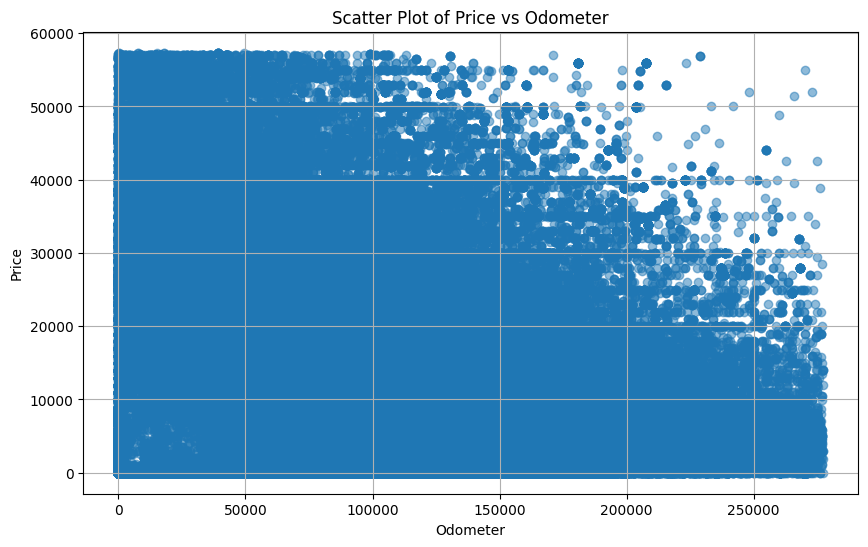

In [20]:
#Creating a scatter plot to visualize the relationship between 'odometer' and 'price'
plt.figure(figsize=(10, 6))
plt.scatter(vehicles['odometer'], vehicles['price'], alpha=0.5)
plt.title('Scatter Plot of Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.grid(True)
plt.show()


C:\Users\Guim\AppData\Local\Temp\ipykernel_18516\842220858.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=vehicles, x='odometer', y='price', ci=None)


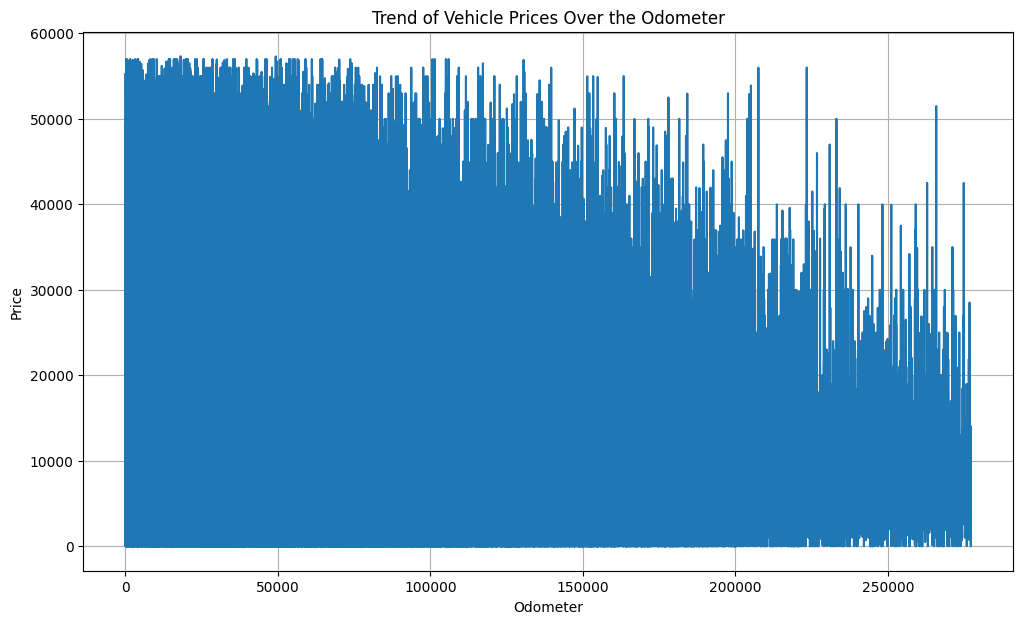

In [21]:
#Creating a line plot to better visualize the trend of price over odometer
plt.figure(figsize=(12, 7))
sns.lineplot(data=vehicles, x='odometer', y='price', ci=None)
plt.title('Trend of Vehicle Prices Over the Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.grid(True)
plt.show()

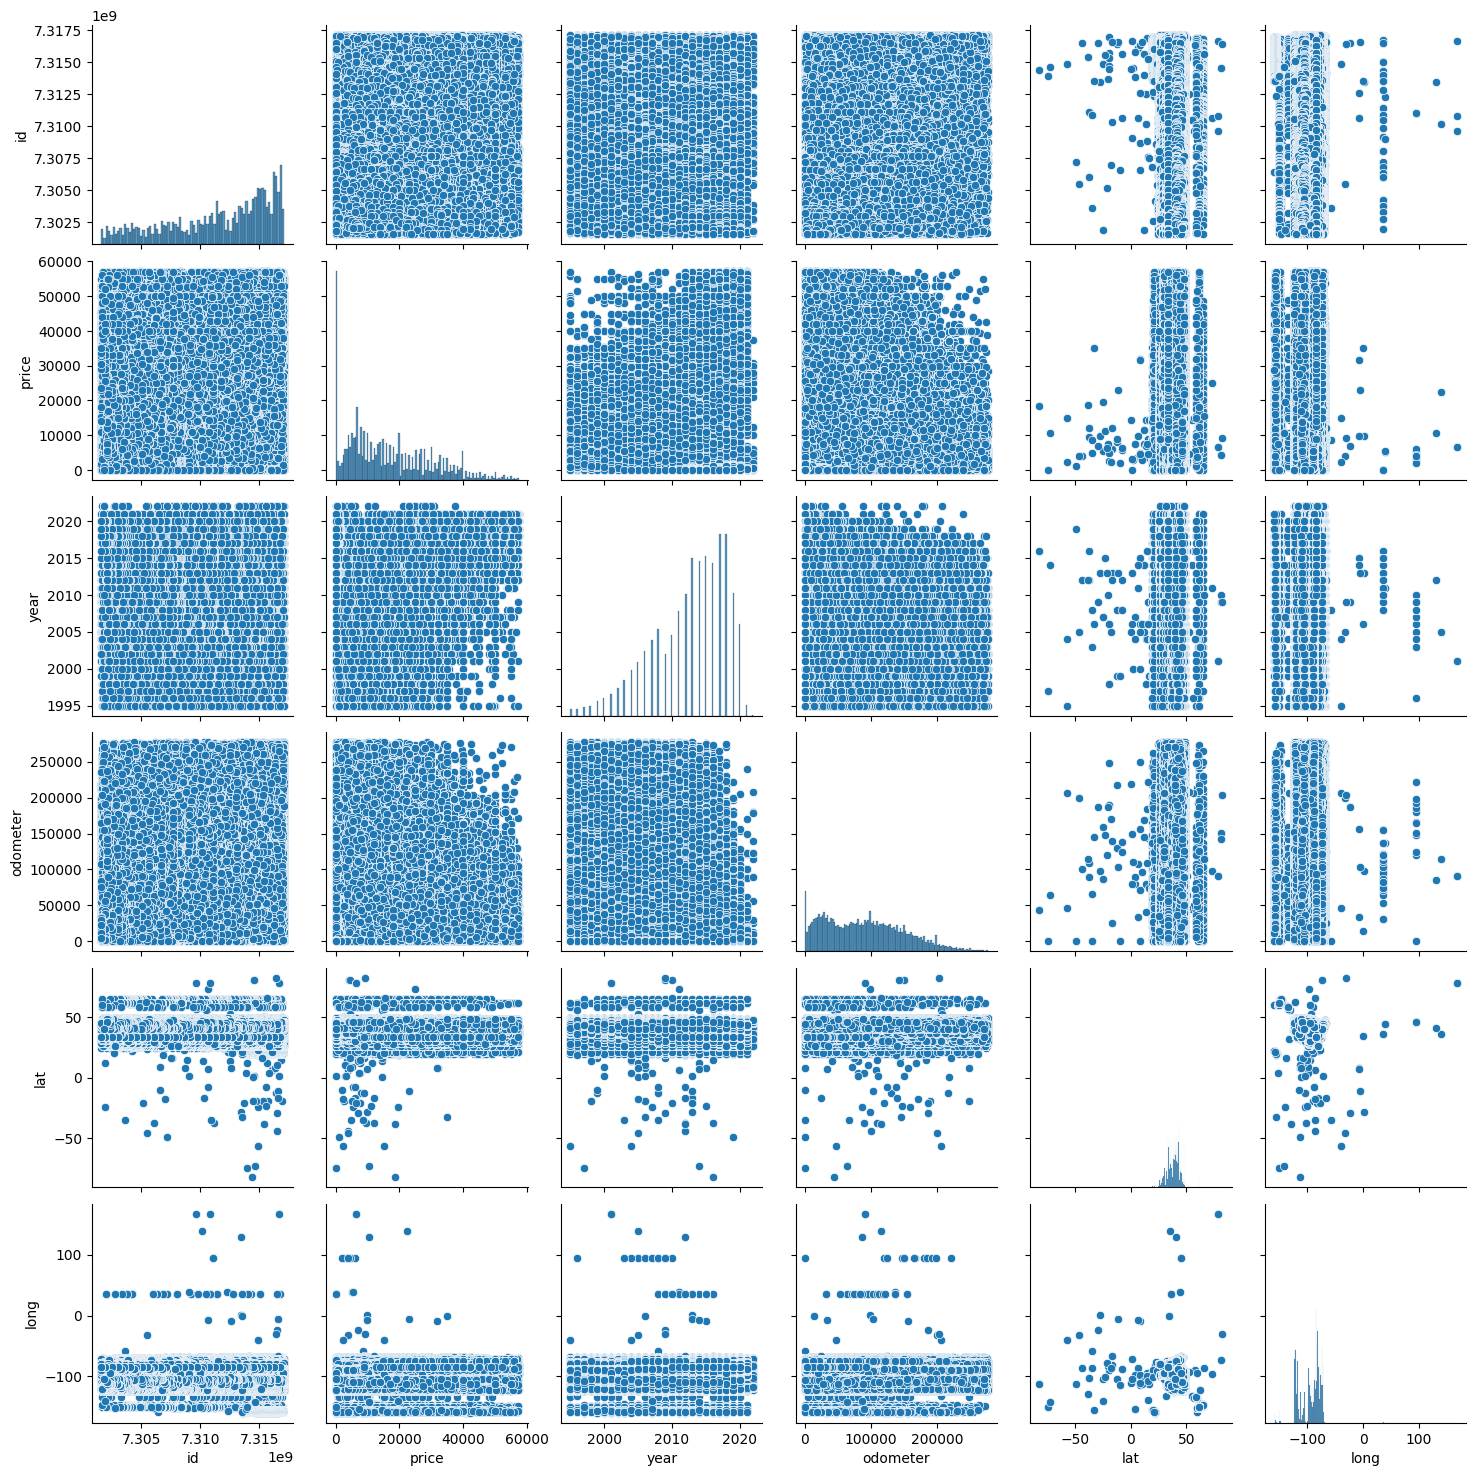

In [22]:
#Using seaborn's pairplot to visualize the relationships between all numerical features
sns.pairplot(vehicles)
plt.show()


## Feature Analysis


The frequency maximum in the histogram indicates the most common range of odometer values among the vehicles listed.

This peak can suggest a typical usage point where many vehicles are sold or considered for resale, possibly due to depreciation factors, maintenance cost considerations, or warranty expirations.

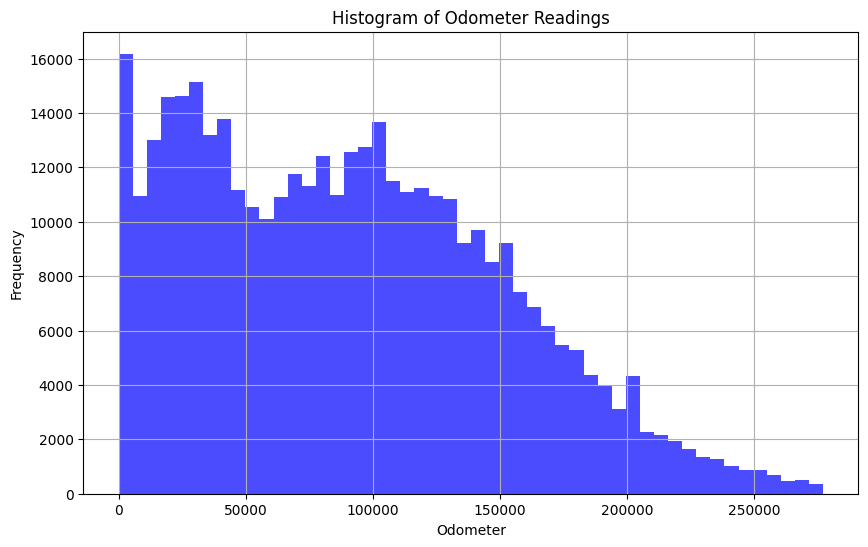

In [23]:
#Plotting histogram for the 'odometer' feature
plt.figure(figsize=(10, 6))
plt.hist(vehicles['odometer'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The peak in the histogram represents the most common age range of vehicles listed for sale.

This could be due to several factors such as the typical depreciation curve of vehicles, where vehicles around this age may offer the best balance between price and functionality, making them more popular among buyers. Additionally, it might indicate the point at which many vehicles are off-leased or when extended warranties often expire, prompting owners to sell.

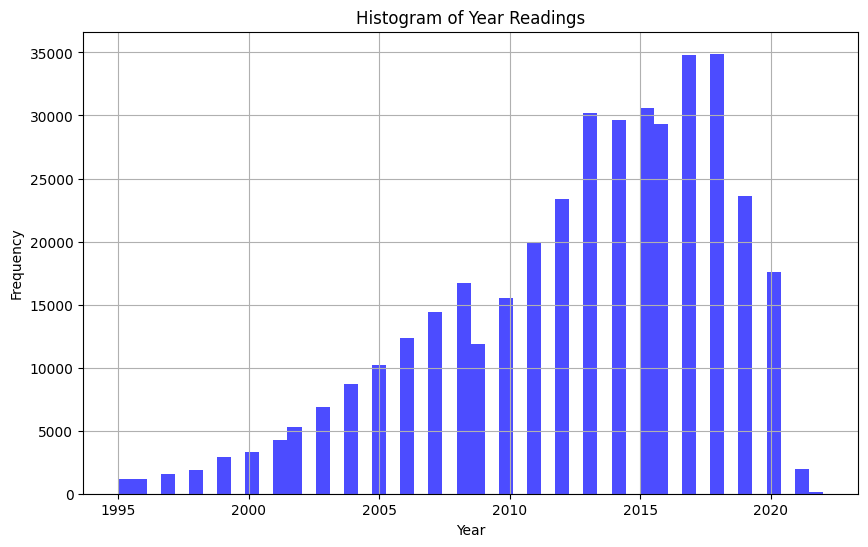

In [24]:
#Plotting histogram for the 'year' feature
plt.figure(figsize=(10, 6))
plt.hist(vehicles['year'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Year Readings')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

After the analysis, we have to make a decision. 

- Sell all the cars older than a specific year.
- Sell all the cars with heavy usage (significant 'odometer' values).
- Sell all the cars with a bad status ('condition' feature).

## Trying to make a decision about which cars we have to sell

Our hypothesis is that no ML algorithm is needed because we don't have enough information in this dataframe. Even though, we will try to create a model in order to make a decision.

In [25]:
#Dropping the columns that we don't need
#clean_vehicles = vehicles.drop(columns=['id','region','manufacturer','model','VIN','description','state','lat','long','posting_date'])
#clean_vehicles.head()

In [26]:
#Dropping the columns that we don't need
clean_vehicles = vehicles.drop(columns=['id','region','manufacturer','model','VIN','description','state','lat','long','posting_date','cylinders','fuel','title_status','transmission','drive','type','paint_color'])
clean_vehicles.head()


,price,year,condition,odometer
27,33590,2014.0,good,57923.0
28,22590,2010.0,good,71229.0
29,39590,2020.0,good,19160.0
30,30990,2017.0,good,41124.0
31,15000,2013.0,excellent,128000.0


In [27]:
#Encoding the categorical variables
#cats = ["condition", "cylinders", "fuel", "title_status", "transmission","drive","type","paint_color"]
cats = ["condition"]
encoder = OneHotEncoder(drop="first")  
vehicles_encoded = encoder.fit_transform(clean_vehicles[cats]).toarray()

In [28]:
vehicles_encoded

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [29]:
#Concatenating the encoded variables with the rest of the dataframe
vehicles_concat = pd.concat([clean_vehicles, pd.DataFrame(vehicles_encoded, columns=encoder.get_feature_names_out(cats))], axis=1)
vehicles_concat.drop(columns=cats,inplace=True)

In [30]:
vehicles_concat

,price,year,odometer,condition_good,condition_new,condition_salvage,condition_nan
27,33590.0,2014.0,57923.0,1.0,0.0,0.0,0.0
28,22590.0,2010.0,71229.0,1.0,0.0,0.0,0.0
29,39590.0,2020.0,19160.0,1.0,0.0,0.0,0.0
30,30990.0,2017.0,41124.0,1.0,0.0,0.0,0.0
31,15000.0,2013.0,128000.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
394188,NaN,NaN,NaN,1.0,0.0,0.0,0.0
394221,NaN,NaN,NaN,0.0,0.0,0.0,1.0
394239,NaN,NaN,NaN,0.0,0.0,0.0,0.0
394243,NaN,NaN,NaN,0.0,0.0,0.0,1.0


In [31]:
vehicles_concat.fillna(0,inplace=True)

In [32]:
#Dropping the rows with 0 values in year and price columns as it doesn't make sense in the context of the dataframe
vehicles_concat = vehicles_concat[(vehicles_concat['year']!=0) & (vehicles_concat['price']!=0)]

In [33]:
#Scaling the data
scaler = StandardScaler()
vehicles_final = scaler.fit_transform(vehicles_concat)

Trying to approach the best number of clusters using the Elbow Method.

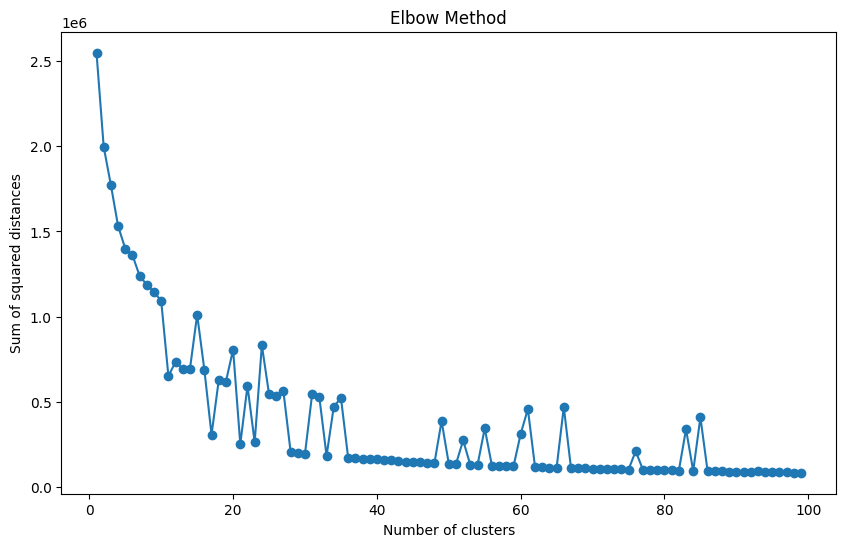

In [34]:
end = 100

#Calculate the sum of squared distances for different numbers of clusters
sse = []
for k in range(1, end):  # Adjust the range as needed
    kmeans = MiniBatchKMeans(n_clusters=k, init='k-means++')
    kmeans.fit(vehicles_final)
    sse.append(kmeans.inertia_)

#Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, end), sse, marker='o')  # Adjust range accordingly
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [35]:
kmeans = MiniBatchKMeans(n_clusters=20, random_state=42,init='k-means++')
kmeans.fit(vehicles_final)

MiniBatchKMeans(n_clusters=20, random_state=42)

In [36]:
kmeans.transform(vehicles_final)

array([[1.79513571, 2.74020381, 4.45951554, ..., 0.8856314 , 3.82799694,
        4.36817101],
       [1.11831131, 2.45177787, 3.7199976 , ..., 1.26126192, 3.44570327,
        3.58414765],
       [2.69413501, 3.35582989, 5.48203037, ..., 1.43455808, 4.56752758,
        5.49649366],
       ...,
       [3.35637605, 2.35019649, 4.92486221, ..., 2.56369634, 3.95269658,
        5.00463568],
       [2.85902464, 1.62079551, 4.32426805, ..., 2.29351674, 3.36341612,
        4.29374833],
       [3.01150088, 1.85921908, 4.54506514, ..., 2.36273277, 3.54975786,
        4.54041066]])

In [37]:
kmeans.predict(vehicles_final)

array([ 5,  0,  5, ..., 16, 16, 16])

In [38]:
#Assigning cluster center coordinates to its respective rows in the dataframe
centers = kmeans.cluster_centers_[kmeans.predict(vehicles_final)]
transformed_df = centers.reshape(vehicles_final.shape)

In [39]:
#Inverting the scaled data to get the original values
inverse_df = scaler.inverse_transform(transformed_df)


In [40]:
#Converting the array back to a DataFrame
cluster_df = pd.DataFrame(inverse_df,columns=vehicles_concat.columns)
cluster_df

,price,year,odometer,condition_good,condition_new,condition_salvage,condition_nan
0,38311.021327,2017.357820,42748.791469,1.000000e+00,3.903128e-18,-4.987330e-18,-1.554312e-15
1,10993.302789,2013.551129,74940.139442,1.000000e+00,1.214306e-17,-6.071532e-18,-2.553513e-15
2,38311.021327,2017.357820,42748.791469,1.000000e+00,3.903128e-18,-4.987330e-18,-1.554312e-15
3,24217.231631,2016.466999,45558.722291,1.000000e+00,1.864828e-17,-6.938894e-18,-1.443290e-15
4,8858.940639,2010.133562,142932.940639,4.329870e-15,2.949030e-17,-6.938894e-18,5.551115e-17
...,...,...,...,...,...,...,...
364065,25227.183246,2017.667539,27029.674084,3.497203e-15,1.344411e-17,-6.722053e-18,-2.386980e-15
364066,25227.183246,2017.667539,27029.674084,3.497203e-15,1.344411e-17,-6.722053e-18,-2.386980e-15
364067,25227.183246,2017.667539,27029.674084,3.497203e-15,1.344411e-17,-6.722053e-18,-2.386980e-15
364068,25227.183246,2017.667539,27029.674084,3.497203e-15,1.344411e-17,-6.722053e-18,-2.386980e-15


As we can see in the cluster_df dataframe, the year and odometer columns don't differ very much between clusters. This means that the data is not very different between the clusters and it's not optimal to make decision based on this results.

In [41]:
cluster_df.year.unique()

array([2017.35781991, 2013.55112882, 2016.46699875, 2010.13356164,
       2017.66753927, 2009.68389423, 2002.59566075, 2016.27880512,
       2014.03113879, 2018.88607595, 2014.29868578, 2011.96969697,
       2017.08165548, 2017.63172414, 2012.03157895, 2005.87457627,
       2010.72243839, 2003.53532609, 2000.82899628, 2002.99470899])

In [42]:
cluster_df.odometer.unique()

array([ 42748.79146919,  74940.13944223,  45558.72229141, 142932.94063927,
        27029.67408377, 139325.82572115, 166596.57790927,  55569.93172119,
        80656.6886121 ,  21614.6835443 ,  92127.7921147 , 107503.72727273,
        30266.77852349,  35791.15586207, 153327.8245614 , 189056.11355932,
        92877.80155642, 204243.75543478, 113701.50185874, 102493.25661376])

In [43]:
vehicles_concat['cluster'] = kmeans.predict(vehicles_final)

C:\Users\Guim\AppData\Local\Temp\ipykernel_18516\3301122914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehicles_concat['cluster'] = kmeans.predict(vehicles_final)


Also, we can see that in every cluster, the year variance between minimum and maximum variables is a lot.

In [44]:
for i in range(20):
    print(f'Minimun year value for vehicles in cluster number {i+1} are {vehicles_concat[vehicles_concat['cluster']==i]['year'].min()}')
    print(f'Maximum year value for vehicles in cluster number {i+1} are {vehicles_concat[vehicles_concat['cluster']==i]['year'].max()}')

Minimun year value for vehicles in cluster number 1 are 1999.0
Maximum year value for vehicles in cluster number 1 are 2022.0
Minimun year value for vehicles in cluster number 2 are 2006.0
Maximum year value for vehicles in cluster number 2 are 2022.0
Minimun year value for vehicles in cluster number 3 are 1995.0
Maximum year value for vehicles in cluster number 3 are 2006.0
Minimun year value for vehicles in cluster number 4 are 2002.0
Maximum year value for vehicles in cluster number 4 are 2021.0
Minimun year value for vehicles in cluster number 5 are 1995.0
Maximum year value for vehicles in cluster number 5 are 2022.0
Minimun year value for vehicles in cluster number 6 are 1995.0
Maximum year value for vehicles in cluster number 6 are 2022.0
Minimun year value for vehicles in cluster number 7 are 1995.0
Maximum year value for vehicles in cluster number 7 are 2009.0
Minimun year value for vehicles in cluster number 8 are 2000.0
Maximum year value for vehicles in cluster number 8 are

So after not being successful in the previous attempt, we have to make a decision. 

- Sell all the cars older than a specific year.
- Sell all the cars with heavy usage (significant 'odometer' values).
- Sell all the cars with a bad status ('condition' feature).


For this variable we will sell all the cars older than 2010. This decision takes place because the market is not over-saturated for cars older than 2010 as we can see in the following image.

# ![Year Frequency](./images/year_freq.png)




In [48]:
# 1. Filter out cars older than a specific year
vehicles_to_sell_year = vehicles[vehicles['year'] <= 2010]

For this variable we will sell all the cars with an odometer value over 150000. This decision takes place because odometer value of 150000 is where the price starts dropping significantly. This means that the cars with odometer values under 150000 are still valuable and we don't have that urgent need to sell them.

# ![Odometer Price](./images/odom_price.png)



In [49]:
# 2. Filter out cars with heavy usage 
vehicles_to_sell_odometer = vehicles[vehicles['odometer'] >= 150000]

For this variable we will sell all the cars with good or salvage condition. This decision is similar to the previous one, as we don't have that urge to sell vehciles in excellent condition because we probably still have time to sell them later at a good price.

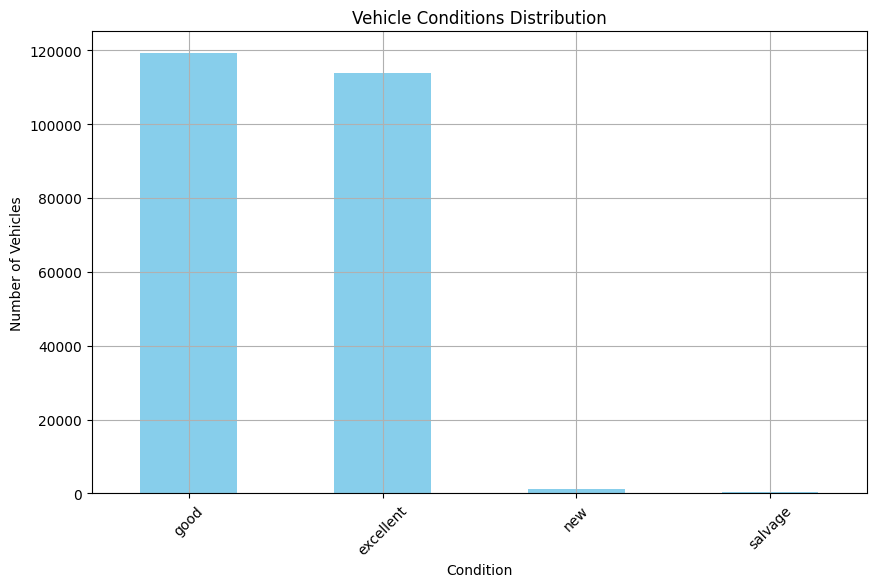

In [50]:
#Count the occurrences of each condition
condition_counts = vehicles['condition'].value_counts()

#Plotting the bar chart
plt.figure(figsize=(10, 6))
condition_counts.plot(kind='bar', color='skyblue')
plt.title('Vehicle Conditions Distribution')
plt.xlabel('Condition')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [51]:
# 3. Filter out cars with a bad status
vehicles_to_sell_bad_status = vehicles[(vehicles['condition'] == 'good') | (vehicles['condition'] == 'salvage')]

After all this filtering, we can get the following dataframe with the vehicles that we want to sell.

In [52]:
# Final Step: Proceed with selling the filtered vehicles based on the defined criteria.
vehicles_to_sell = vehicles[(vehicles['year'] <= 2010)|(vehicles['odometer'] >= 150000)|(vehicles['condition'] == 'good') | (vehicles['condition'] == 'salvage')]

In [53]:
vehicles_to_sell

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,VIN,drive,type,paint_color,description,state,lat,long,posting_date
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,...,other,3GTP1VEC4EG551563,NaN,pickup,white,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:18-0500
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,...,other,1GCSCSE06AZ123805,NaN,pickup,blue,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:08-0500
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,...,other,3GCPWCED5LG130317,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:25-0500
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,...,other,5TFRM5F17HX120972,NaN,pickup,red,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T10:41:31-0500
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,...,other,1GT220CG8CZ231238,4wd,pickup,black,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-03T13:41:25-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,...,other,1N4AA6AV6KC367801,fwd,sedan,NaN,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,...,other,7JR102FKXLG042696,fwd,sedan,red,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,...,other,1GYFZFR46LF088296,NaN,hatchback,white,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,...,other,58ABK1GG4JU103853,fwd,sedan,silver,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [54]:
"Percentage of vehicles to be sold: {:.2f}%".format(len(vehicles_to_sell)/len(vehicles)*100)


'Percentage of vehicles to be sold: 55.51%'